# Data Download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats

In [2]:
path = "./data/"

df = pd.read_csv(path + "VBM_data.csv")
df=df.drop(columns=['Unnamed: 0'])

In [3]:
df.tail()

Subjectt     Sex  Age  PD Chr  PSQI  Scale factor      SNR  \
33  Sleep118  Female   31   0  LC     4       0.78951  27.9518   
34  Sleep120    Male   35   0  EC     3       0.86815  24.4561   
35  Sleep130    Male   30   0  EC     1       0.86170  22.1373   
36  Sleep133    Male   31   0  LC     3       0.83071  24.9559   
37  Sleep145  Female   32   0  LC     1       0.64341   26.222   

   White Matter (WM) volume cm3 White Matter (WM) volume %  ...  \
33                     540.4234                    37.1201  ...   
34                     578.6702                    36.0603  ...   
35                     568.7254                    35.7037  ...   
36                     545.4507                    35.3801  ...   
37                     423.5024                    35.5385  ...   

   FO left thickness mm FO left thickness norm.  FO thickness asymmetry  \
33               2.8215                0.024895               -0.018867   
34               3.0264                0.025850                -0.11714   
35               2.5093                0.021486                  22.291   
36               2.8648                0.024799                  7.6636   
37               2.4775                0.023369                 10.4448   

    PO total thickness mm PO total thickness norm.  PO right thickness mm  \
33                 1.9801                 0.017471                 1.9126   
34                  2.116                 0.018073                 2.0048   
35                 2.0657                 0.017688                 2.1941   
36                 2.1541                 0.018646                 2.2177   
37                 1.7784                 0.016774                 1.9617   

   PO right thickness norm. PO left thickness mm PO left thickness norm.  \
33                 0.016875               2.0498                0.018085   
34                 0.017124               2.2209                0.018970   
35                 0.018787               1.9476                0.016676   
36                 0.019197               2.1097                0.018262   
37                 0.018503               1.6418                0.015485   

   PO thickness asymmetry  
33                -6.9236  
34               -10.2288  
35                11.9037  
36                 4.9912  
37                 17.759  

[5 rows x 933 columns]

In [4]:
from sklearn.preprocessing import LabelEncoder
categ = ['Subjectt','Sex','Chr']

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].apply(lambda x: str(x.replace(",", "")))
        df[column] =df[column].astype("float")

df.tail()

Subjectt  Sex  Age  PD  Chr  PSQI  Scale factor      SNR  \
33        21    0   31   0    1     4       0.78951  27.9518   
34        22    1   35   0    0     3       0.86815  24.4561   
35        23    1   30   0    0     1       0.86170  22.1373   
36        24    1   31   0    1     3       0.83071  24.9559   
37        25    0   32   0    1     1       0.64341  26.2220   

    White Matter (WM) volume cm3  White Matter (WM) volume %  ...  \
33                      540.4234                     37.1201  ...   
34                      578.6702                     36.0603  ...   
35                      568.7254                     35.7037  ...   
36                      545.4507                     35.3801  ...   
37                      423.5024                     35.5385  ...   

    FO left thickness mm  FO left thickness norm.  FO thickness asymmetry  \
33                2.8215                 0.024895               -0.018867   
34                3.0264                 0.025850               -0.117140   
35                2.5093                 0.021486               22.291000   
36                2.8648                 0.024799                7.663600   
37                2.4775                 0.023369               10.444800   

    PO total thickness mm  PO total thickness norm.  PO right thickness mm  \
33                 1.9801                  0.017471                 1.9126   
34                 2.1160                  0.018073                 2.0048   
35                 2.0657                  0.017688                 2.1941   
36                 2.1541                  0.018646                 2.2177   
37                 1.7784                  0.016774                 1.9617   

    PO right thickness norm.  PO left thickness mm  PO left thickness norm.  \
33                  0.016875                2.0498                 0.018085   
34                  0.017124                2.2209                 0.018970   
35                  0.018787                1.9476                 0.016676   
36                  0.019197                2.1097                 0.018262   
37                  0.018503                1.6418                 0.015485   

    PO thickness asymmetry  
33                 -6.9236  
34                -10.2288  
35                 11.9037  
36                  4.9912  
37                 17.7590  

[5 rows x 933 columns]

In [6]:
import pandas as pd
from scipy import stats

# Filter the dataframe based on PD values
age_parkinson = df[df['PD'] == 1]['Age']
age_hc = df[df['PD'] == 0]['Age']

# Perform Mann-Whitney U test
_, p_age = stats.mannwhitneyu(age_parkinson, age_hc)
print(_, p_age)

330.0 8.891136340746978e-07


In [7]:
import numpy as np
from scipy.stats import chi2_contingency

# Filter the dataframe based on PD values
sex_parkinson = df[df['PD'] == 1]['Sex']
sex_hc = df[df['PD'] == 0]['Sex']

# Calculate the frequencies or counts of each sex category in each group
categories = np.unique(np.concatenate((sex_parkinson, sex_hc)))  # Unique categories
count_parkinson = np.array([np.sum(sex_parkinson == category) for category in categories])
count_hc = np.array([np.sum(sex_hc == category) for category in categories])

# Create the contingency table
contingency_table = np.array([count_parkinson, count_hc])

# Perform the chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 1.5836474867724863
p-value: 0.20823608382314834


# T-test with Pathology and ICV

In [5]:
pd = df.query('PD == 1')['Intracranial Cavity (IC) volume cm3']
sleep = df.query('PD == 0')['Intracranial Cavity (IC) volume cm3']

In [6]:
df.groupby('PD').describe()

Subjectt                                                   Sex            \
      count  mean       std   min    25%   50%    75%   max count      mean   
PD                                                                            
0      24.0  25.5  7.071068  14.0  19.75  25.5  31.25  37.0  24.0  0.375000   
1      14.0   6.5  4.183300   0.0   3.25   6.5   9.75  13.0  14.0  0.642857   

    ... PO left thickness norm.           PO thickness asymmetry               \
    ...                     75%       max                  count         mean   
PD  ...                                                                         
0   ...                0.022522  0.025270                   24.0 -1157.282513   
1   ...                0.020938  0.022373                   14.0    -6.762095   

                                                                     
            std        min        25%      50%       75%        max  
PD                                                                   
0   7748.372456 -36539.000 -10.813825 -2.60090  7.771025  8826.0000  
1     16.358035    -33.034 -18.251150 -6.10515  3.119242    28.5582  

[2 rows x 7456 columns]

In [7]:
#is data distribution normal

stats.shapiro(pd)

ShapiroResult(statistic=0.9541175365447998, pvalue=0.626254677772522)

In [8]:
stats.shapiro(sleep)

ShapiroResult(statistic=0.9306058287620544, pvalue=0.10057485103607178)

In [9]:
#is data homogenous

stats.levene(pd, sleep)

LeveneResult(statistic=0.5269244586878069, pvalue=0.47259587614457266)

In [10]:
res = stats.ttest_ind(pd, sleep, 
                      equal_var=True)

display(res)

Ttest_indResult(statistic=1.1549106315010724, pvalue=0.2557356458485105)

In [11]:
#data non normal

res = stats.ttest_ind(pd, sleep, 
                      equal_var=False)

display(res)

Ttest_indResult(statistic=1.161095882572876, pvalue=0.25548230823912765)

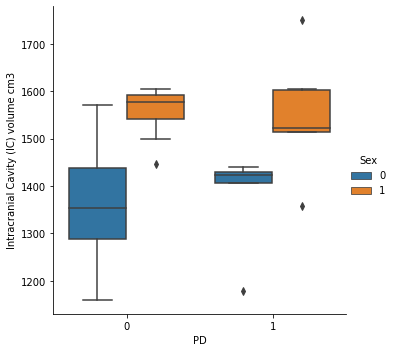

In [12]:
sns.catplot(x='PD', y='Intracranial Cavity (IC) volume cm3', hue='Sex',data=df, kind='box')

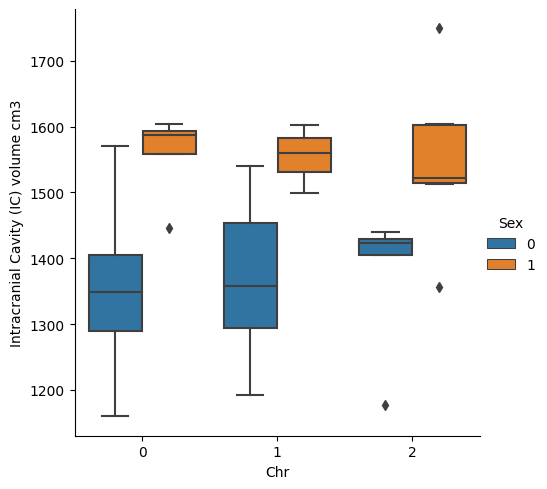

In [13]:
sns.catplot(x='Chr', y='Intracranial Cavity (IC) volume cm3', hue='Sex',data=df, kind='box')

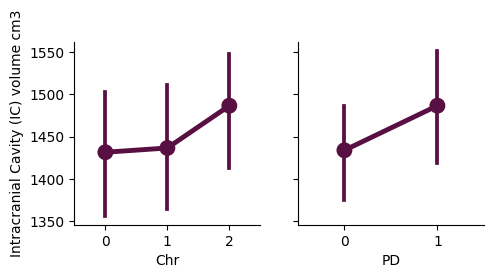

In [14]:
g = sns.PairGrid(df, y_vars='Intracranial Cavity (IC) volume cm3',x_vars=['Chr','PD'])
g.map(sns.pointplot, scale=1.3, errwidt=4, color='xkcd:plum')

# T-test with Grey & White Matter

In [15]:
pd_gm = df.query('PD == 1')['Grey Matter (GM) volume cm3']
sleep_gm = df.query('PD == 0')['Grey Matter (GM) volume cm3']

In [16]:
res = stats.ttest_ind(pd_gm, sleep_gm, 
                      equal_var=False)

display(res)

Ttest_indResult(statistic=-1.446109434820412, pvalue=0.16163698773718252)

In [17]:
pd_wm = df.query('PD == 1')['White Matter (WM) volume cm3']
sleep_wm = df.query('PD == 0')['White Matter (WM) volume cm3']

In [18]:
res = stats.ttest_ind(pd_wm, sleep_wm, 
                      equal_var=False)

display(res)

Ttest_indResult(statistic=-1.810755142268041, pvalue=0.08326219861582436)

In [19]:
pd_sgm = df.query('PD == 1')['Subcortical Grey Matter volume cm3']
sleep_sgm = df.query('PD == 0')['Subcortical Grey Matter volume cm3']

In [20]:
res = stats.ttest_ind(pd_sgm, sleep_sgm, 
                      equal_var=False)

display(res)

Ttest_indResult(statistic=-1.4405514796089016, pvalue=0.16318678539226378)

## T-Test Chr 


In [21]:
late_ICV = df.query('Chr == 1')['Intracranial Cavity (IC) volume cm3']
early_ICV = df.query('Chr == 0')['Intracranial Cavity (IC) volume cm3']

late_gm = df.query('Chr == 1')['Grey Matter (GM) volume cm3']
early_gm = df.query('Chr == 0')['Grey Matter (GM) volume cm3']

late_wm = df.query('Chr == 1')['White Matter (WM) volume cm3']
early_wm = df.query('Chr == 0')['White Matter (WM) volume cm3']

late_sgm = df.query('Chr == 1')['Subcortical Grey Matter volume cm3']
early_sgm = df.query('Chr == 0')['Subcortical Grey Matter volume cm3']

In [22]:
res = stats.ttest_ind(pd, late_ICV, 
                      equal_var=False)

display(res)

Ttest_indResult(statistic=0.9212951095906194, pvalue=0.3671037465302972)

In [23]:
res = stats.ttest_ind(pd, early_ICV, 
                      equal_var=False)

display(res)

Ttest_indResult(statistic=1.0279641274249514, pvalue=0.3140145932544987)

# Correlation

In [24]:
X = df.loc[:, df.columns.drop(["Subjectt", "Age","Sex", "Chr", "PSQI"])]
corr = X.corr()
#corr.style.background_gradient(cmap='coolwarm')

In [25]:
X.corr().unstack().sort_values().drop_duplicates()

TTG volume asymmetry         MFG left thickness mm               -0.999997
FuG right volume cm3         TTG volume asymmetry                -0.999996
Cerebrum WM left volume %    ACgG thickness asymmetry            -0.999996
TTG volume asymmetry         TMP left volume %                   -0.999996
Thalamus left volume cm3     ACgG thickness asymmetry            -0.999996
                                                                    ...   
MPrG left thickness mm       MPrG total thickness mm              1.000000
ACgG total thickness mm      ACgG right thickness mm              1.000000
Cerebellum GM left volume %  Cerebellar Grey Matter volume %      1.000000
PO left thickness norm.      PO left thickness norm.              1.000000
PD                           Intracranial Cavity (IC) volume %         NaN
Length: 427395, dtype: float64

In [26]:
X.corrwith(X["PD"], axis=0, drop=False, method='pearson')

PD                              1.000000
Scale factor                    0.201150
SNR                             0.215419
White Matter (WM) volume cm3   -0.223384
White Matter (WM) volume %      0.073770
                                  ...   
PO right thickness mm           0.380477
PO right thickness norm.       -0.219277
PO left thickness mm           -0.177737
PO left thickness norm.        -0.124452
PO thickness asymmetry          0.091678
Length: 928, dtype: float64

In [25]:
#upper = corr.where((np.triu(np.ones(corr.shape), k=1) + np.tril(np.ones(corr.shape), k=-1)).astype(bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

<AxesSubplot:>

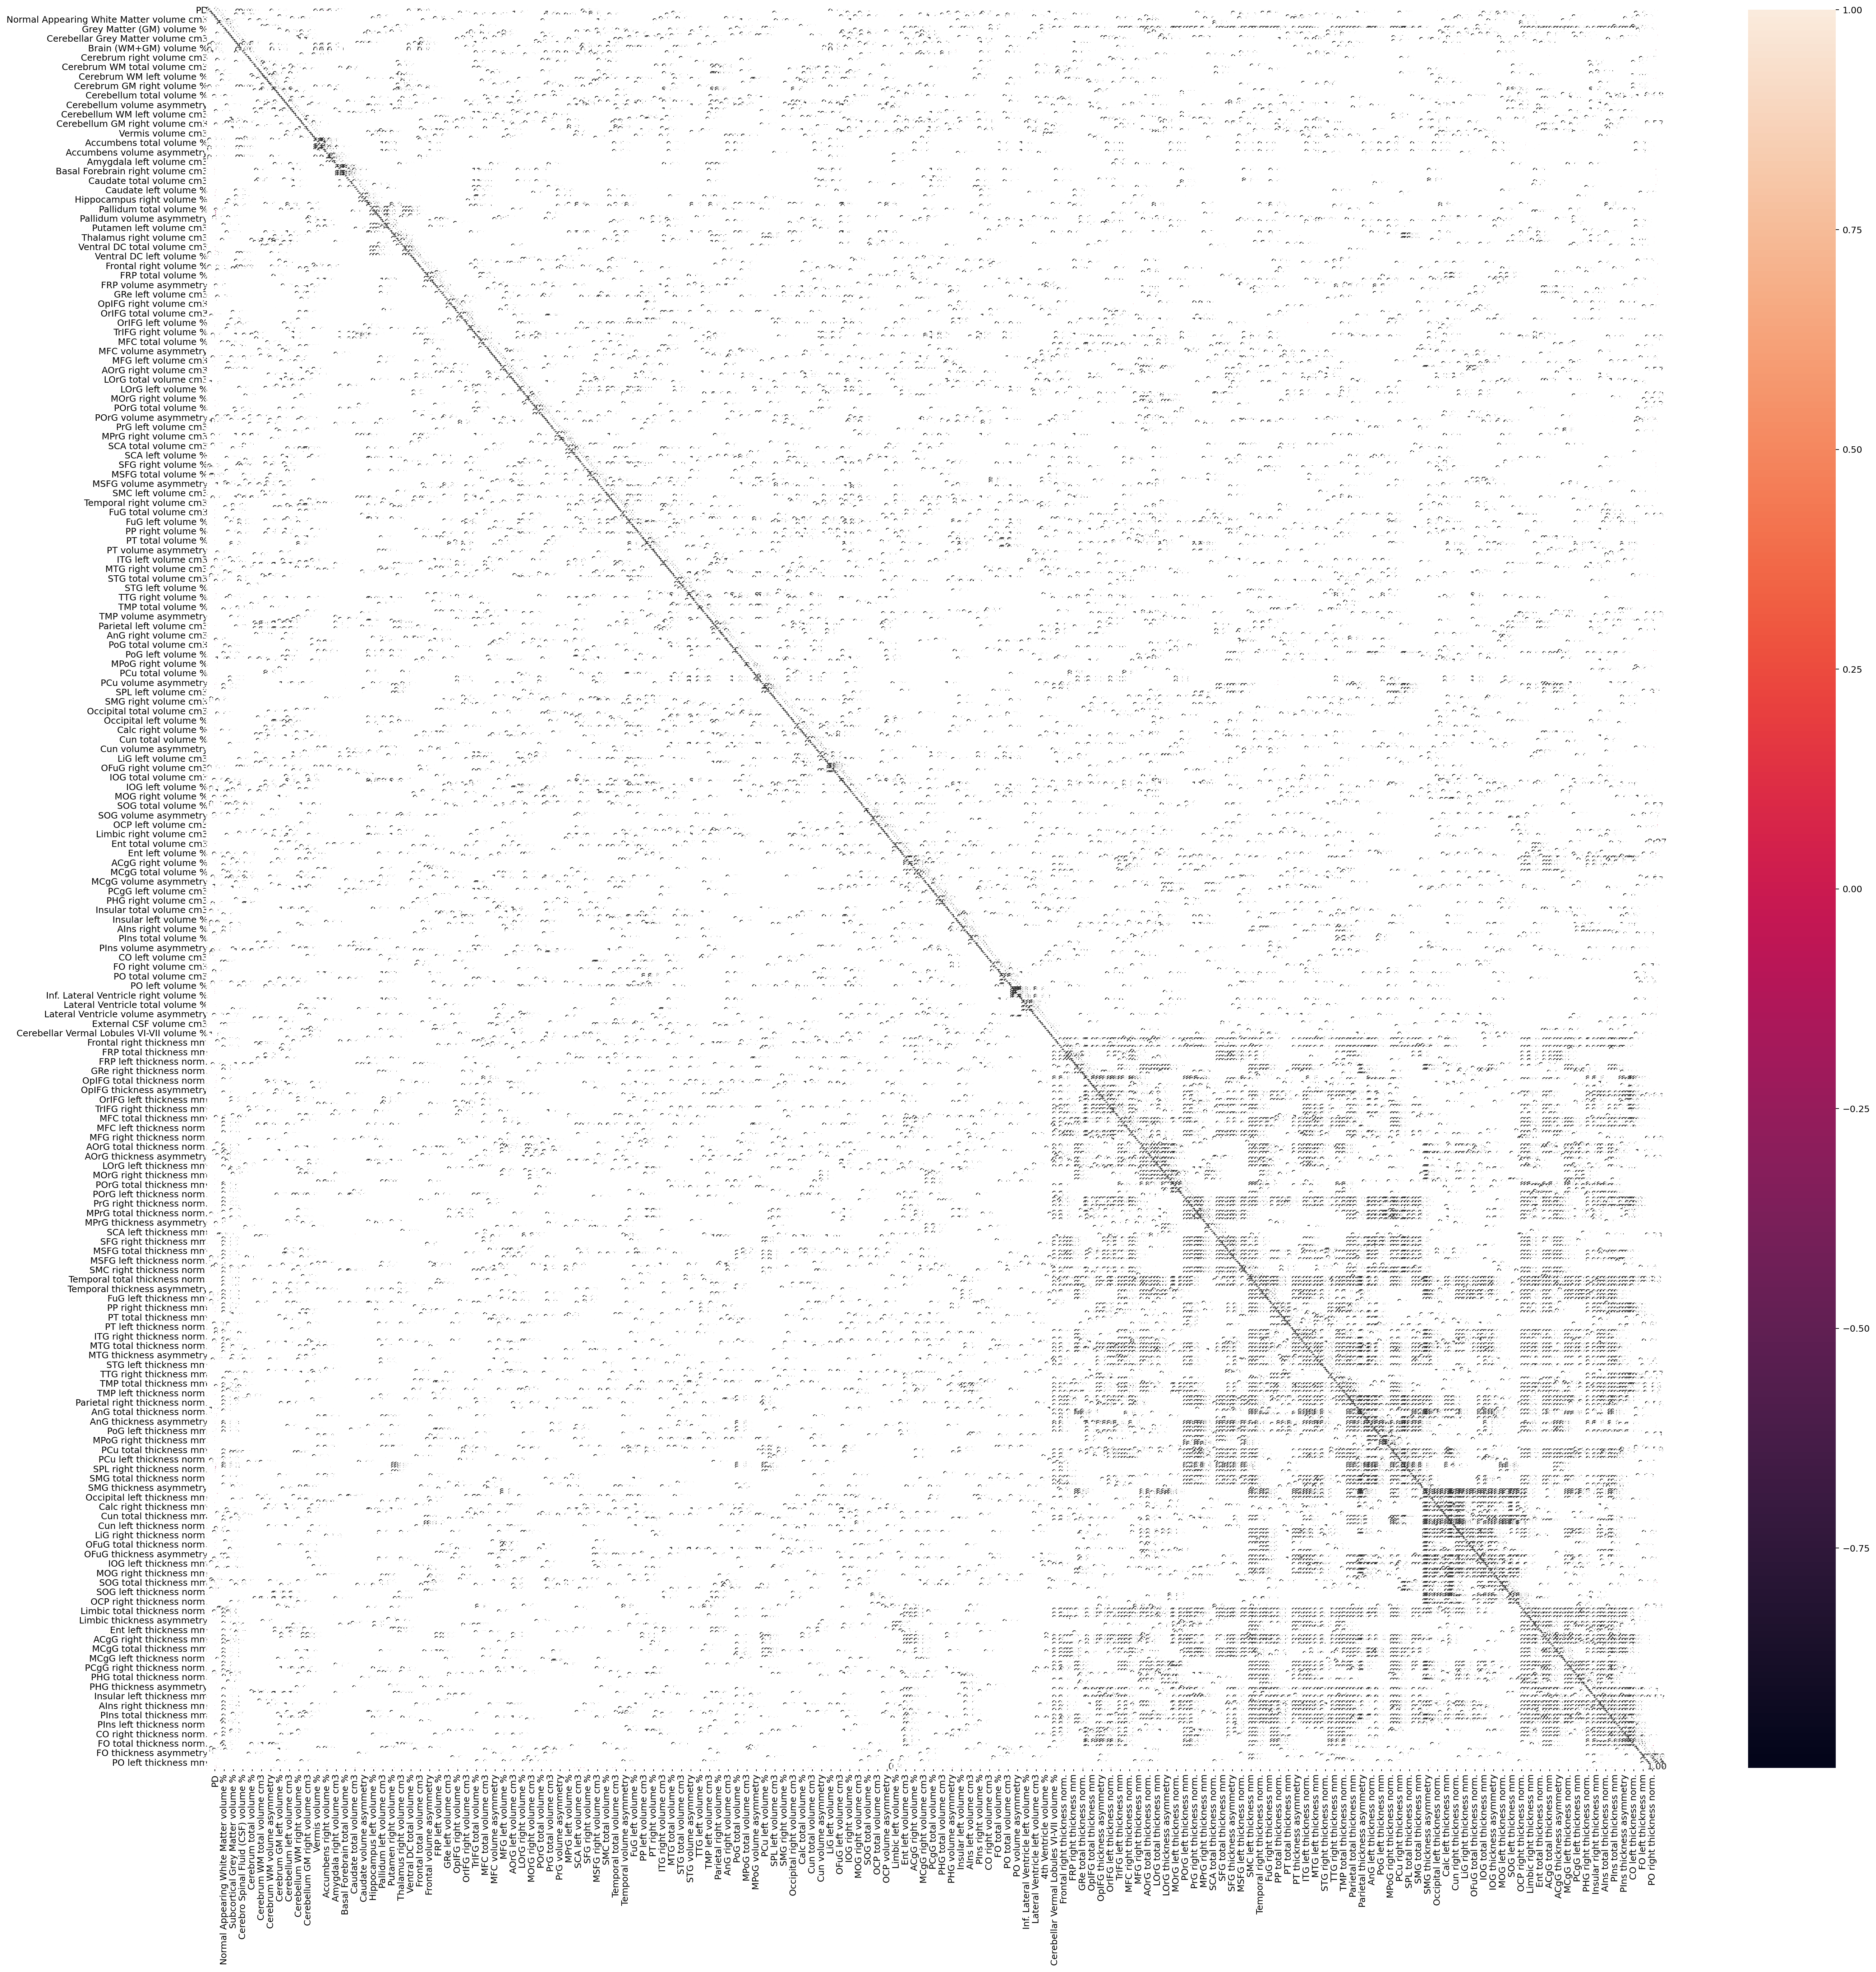

In [11]:
fig = plt.figure(figsize=(36,36), dpi = 180)
sns.heatmap(corr, annot = True, fmt = '.2f')

## Synth Data

In [8]:
%pip install sdv

  Using cached sdv-0.15.0-py2.py3-none-any.whl (102 kB)
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
     |████████████████████████████████| 18.1 MB 2.5 MB/s eta 0:00:01
  Using cached ctgan-0.5.1-py2.py3-none-any.whl (24 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached copulas-0.7.0-py2.py3-none-any.whl (53 kB)
  Using cached rdt-0.6.4-py2.py3-none-any.whl (45 kB)
  Using cached sdmetrics-0.5.0-py2.py3-none-any.whl (98 kB)
  Using cached Faker-9.9.1-py3-none-any.whl (1.2 MB)
  Using cached deepecho-0.3.0.post1-py2.py3-none-any.whl (26 kB)
     |████████████████████████████████| 133.6 MB 898 kB/s eta 0:00:011
     |████████████████████████████████| 1.3 MB 23.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 2.4 MB/s eta 0:00:01
  Using cached pyts-0.12.0-py3-none-any.whl (2.5 MB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
     |████████████████████████████████| 62 kB 10.1 MB/s eta 0:00:01
  Using cached fonttools-4.

In [6]:
from sdv.lite import TabularPreset

model = TabularPreset(name='FAST_ML')
model.fit(df)

/opt/homebrew/Caskroom/miniforge/base/envs/pd_sleep/lib/python3.9/site-packages/sdv/lite/tabular.py:51: UserWarning: No metadata provided. Metadata will be automatically detected from your data. This process may not be accurate. We recommend writing metadata to ensure correct data handling.
  warnings.warn('No metadata provided. Metadata will be automatically '


In [8]:
#model.sample(num_rows=1000, batch_size=100, output_file_path='synthetic_data.csv')

In [9]:
sf = pd.read_csv("synthetic_data.csv")
sf.shape

(1000, 933)

In [10]:
from sdv.evaluation import evaluate
from sdv.metrics.tabular import CSTest, KSTest
from sdv.metrics.tabular import BinaryLogisticRegression

In [14]:
BinaryLogisticRegression.compute(df, sf, target='PD')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import (
    KFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
np.random.seed(3)

In [19]:
X = sf.loc[:, sf.columns.drop(["Subjectt", "Sex", "Chr", "PD", "PSQI"])]

y = sf.pop("PD")

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].apply(lambda x: str(x.replace(',', '')))
        X[column] = X[column].astype('float')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (700, 928)
X_test dimension=  (300, 928)
y_train dimension=  (700,)
y_train dimension=  (300,)


In [21]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear',max_iter=760)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=760, multi_class='ovr', solver='liblinear')

In [22]:
lm.score(X_test, y_test)

0.74

In [23]:
weights = np.ravel(lm.coef_)
weights = weights*10
regionsWeights = X[:]

<AxesSubplot:title={'center':'Feature Importance'}>

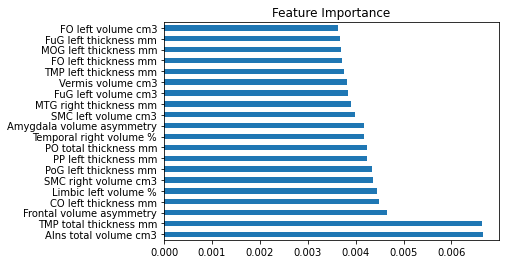

In [24]:
importance = lm.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')